original


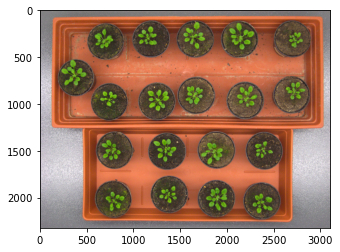

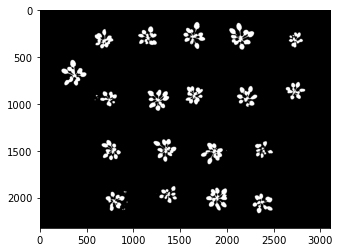

Number of contours = 63


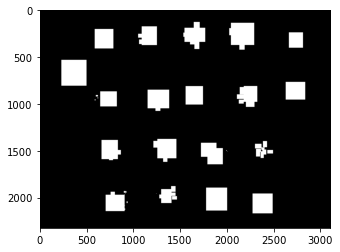

Number of contours = 28


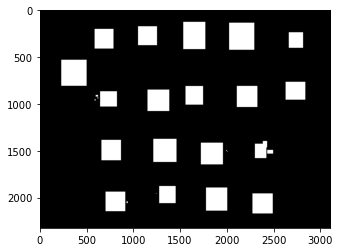

Number of contours = 23


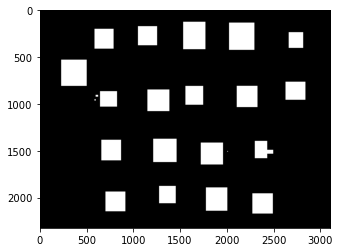

Number of contours = 20


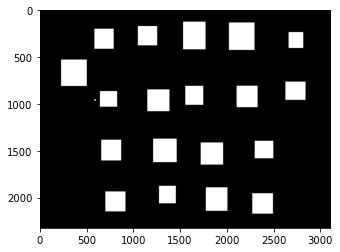

Number of contours = 19


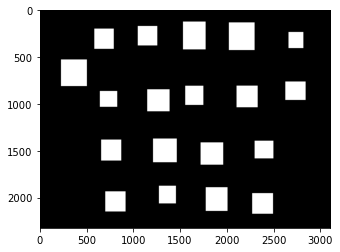

red is generted, green is provided


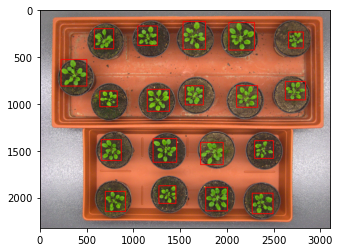

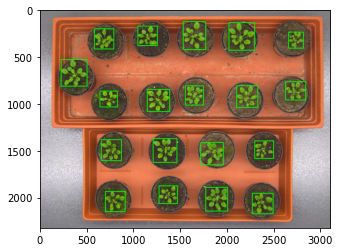

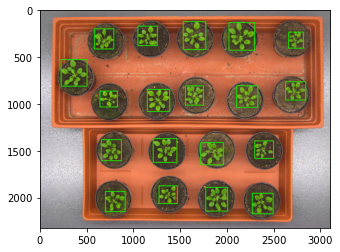

predicted boundary:


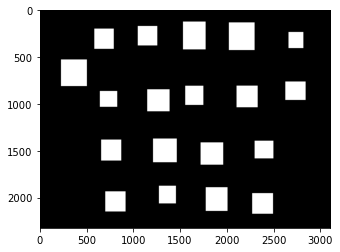

actual boundary:


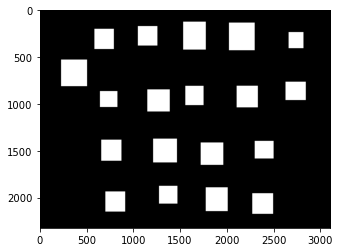

Precision: 0.989178823509942


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import csv
from sklearn.metrics import confusion_matrix

file = 'Tray/Ara2012/ara2012_tray02'
image = cv2.imread(file + '_rgb.png')
print("original")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
imageO = np.copy(image)
imageR = np.copy(image)
he = image.shape[0]

#LAB
LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lower_green = np.array([1,1,80])
upper_green = np.array([255,100,217])
mask = cv2.inRange(LAB, lower_green, upper_green)
mask = cv2.medianBlur(mask,7)
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()


mask2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
mask2[mask2 <= 255] = 0

corners = []
count = 26
for a in range(9):
    if count < 20:
        continue
    if a > 0:
        gray = image
    if a == 0:
        gray = mask

    image = np.copy(mask2)
    edged = cv2.Canny(gray, 30, 200)

    contours, hierarchy = cv2.findContours(edged,  
        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

    rects = []
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        rects.append([x, y, w, h])
        rects.append([x, y, w, h])
    rects,weights = cv2.groupRectangles(rects, 1, 0.1*a)
    count = len(rects)
    print("Number of contours = " + str(count)) 
    for rec in rects:
        cv2.rectangle(image,(rec[0],rec[1]),(rec[0]+rec[2],rec[1]+rec[3]),255,-1)
        if (count < 20 or a == 8):
            x = [rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]]
            corners.append(x)
            cv2.rectangle(imageO,(rec[0],rec[1]),(rec[0]+rec[2],rec[1]+rec[3]),(255,0,0),7)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
print("red is generted, green is provided")
plt.imshow(imageO)
plt.show()
corners  = sorted(corners,key=lambda x: (x[1]))
corners = np.array(corners)
corners = np.resize(corners,(6,6,4))
for a in range(6):
    corners[a] = np.sort(corners[a],0)
corners = np.resize(corners,(24,4))
corners = corners.tolist()
#print(corners)

included_cols = [0, 1, 4, 5]
content = []
with open(file + '_bbox.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        x = [int(row[0]),int(row[1]),int(row[4]),int(row[5])]
        content.append(x)
        #content.append(list(row[i] for i in included_cols))
mask2 = np.copy(image)
mask2[mask2 <= 255] = 0
for r in content:
    cv2.rectangle(imageO , (int(r[0]),int(r[1])) , (int(r[2]),int(r[3])) , (0,255,0) , 7)
    cv2.rectangle(imageR , (int(r[0]),int(r[1])) , (int(r[2]),int(r[3])) , (0,255,0) , 7)
    cv2.rectangle(mask2 , (int(r[0]),int(r[1])) , (int(r[2]),int(r[3])) , (255) , -1)
plt.imshow(imageR)
plt.show()
plt.imshow(imageO)
plt.show()
        
print("predicted boundary:")
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

print("actual boundary:")
plt.imshow(mask2, cmap=plt.cm.gray)
plt.show()

mask2 = cv2.normalize(mask2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=1)
mask2 = np.reshape(mask2,-1)

image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=1)
image = np.reshape(image,-1)
    
tn, fp, fn, tp = confusion_matrix(mask2, image).ravel()
prec = tp/(tp + fp)
print("Precision: " + str(prec))